In [1]:
import json
from datetime import datetime

import numpy as np


# Notebook for Shift with Chenran

Shift on  28 and 29 September 2022 for testing Bayesian Optimisation (BO) against Reinforcement Learning (RL).

Once we know BO is working in the machine, the plan is to test BO and RL in pairs on the same problems (targets) and compare their performance in the real world.

In [2]:
# Define target (and thresholds) ... max steps is chosen seperately for each algorithm
# comment = "test"

# target_mu_x = 0.0
# target_sigma_x = 0.0
# target_mu_y = 0.0
# target_sigma_y = 0.0

# target_mu_x_threshold = 3.3198e-6
# target_mu_y_threshold = 3.3198e-6
# target_sigma_x_threshold = 3.3198e-6
# target_sigma_y_threshold = 3.3198e-6


In [3]:
# # Load problem
problem_index = 37

with open("problems.json", "r") as f:
    problem = json.load(f)[problem_index]

comment = f"problem_{problem_index:03d}"

# Note that the indicies are still according to the old order mu_x, mu_y, sigma_x, sigma_y
target_mu_x = problem["desired"][0]
target_sigma_x = problem["desired"][2]
target_mu_y = problem["desired"][1]
target_sigma_y = problem["desired"][3]

target_mu_x_threshold = 3.3198e-6
target_mu_y_threshold = 3.3198e-6
target_sigma_x_threshold = 3.3198e-6
target_sigma_y_threshold = 3.3198e-6


In [4]:
from ea_optimize import ARESEADOOCS

env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
env.reset()

initializing ocelot...


{'beam': array([ 0.0008943 ,  0.0011332 , -0.00040005,  0.00095128], dtype=float32),
 'magnets': array([0., 0., 0., 0., 0.], dtype=float32),
 'target': array([-0.00182162,  0.00089736, -0.00125359,  0.00047118], dtype=float32)}

In [5]:
# Bayesian Optimisation
from ea_bo import optimize

optimize(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=10,
    model_name="Bayesian Optimisation",
    logbook=True,
    data_log_dir=f"data/bo_vs_rl/real/bo_ucb/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
    acquisition="EI",
    init_x=None,
    init_samples=5,
    filter_action=None,
    magnet_init_values=np.array([10, -10, 0, 10, 0]),
)


 50%|█████     | 5/10 [00:33<00:32,  6.47s/it]

InputDataError: Expected all inputs to share the same dtype. Got torch.float64 for X, torch.float32 for Y, and None for Yvar.

In [6]:
from ea_optimize import ARESEADOOCS

env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
env.reset()

{'beam': array([ 0.00026226,  0.00024247, -0.00063008,  0.00035015], dtype=float32),
 'magnets': array([-2.5801668e-11, -2.8266923e-03,  8.1280665e-14, -2.5801668e-11,
         8.1175511e-14], dtype=float32),
 'target': array([-0.00140264,  0.00131039, -0.00174637,  0.00142324], dtype=float32)}

/home/kaiserja/.conda/envs/rl39ng/lib/python3.9/site-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
  warnings.warn(
100%|██████████| 50/50 [08:27<00:00, 10.16s/it]


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2022-11-10 16:50:21.471574\nTime taken: 0:08:32.983760\nNo. of steps: 50\n\nBeam before:\n    mu_x    =  0.2357 mm\n    sigma_x =  0.2453 mm\n    mu_y    = -0.6325 mm\n    sigma_y =  0.3439 mm\n\nBeam after:\n    mu_x    = -1.9969 mm\n    sigma_x =  0.3848 mm\n    mu_y    = -0.8209 mm\n    sigma_y =  0.0738 mm\n\nTarget beam:\n    mu_x    = -1.9934 mm    (e = 0.0033 mm) :/\n    sigma_x =  0.3793 mm    (e = 0.0033 mm) :/\n    mu_y    = -0.8155 mm    (e = 0.0033 mm) :/\n    sigma_y =  0.0322 mm    (e = 0.0033 mm) :/\n\nFinal magnet settings:\n    AREAMQZM1 strength =   1.8473 1/m^2\n    AREAMQZM2 strength =  -5.3240 1/m^2\n    AREAMCVM1 kick     =   1.0524 mrad\n    AREAMQZM3 strength =  -7.1310 1/m^2\n    AREAMCHM1 kick     =  -3.7745 mrad\n    '


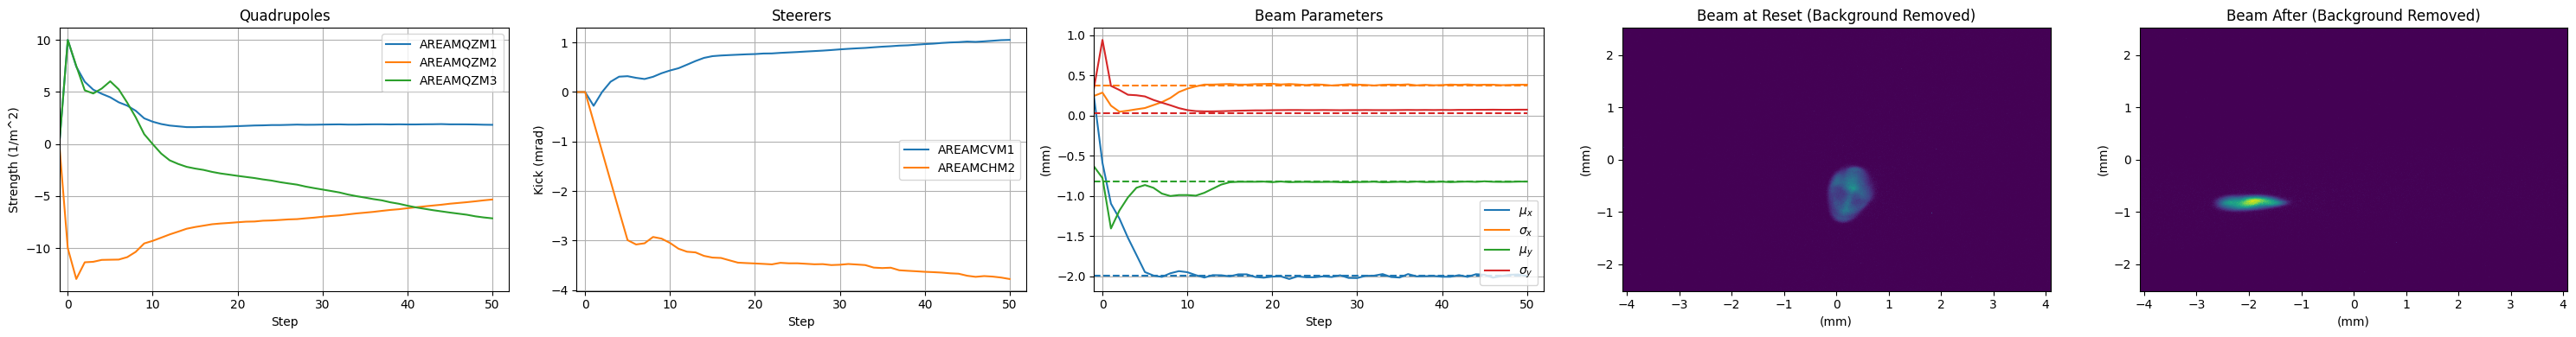

In [7]:
# Reinforcement Learning
from ea_optimize import optimize_donkey

optimize_donkey(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=50,
    model_name="polished-donkey-996",
    logbook=True,
    data_log_dir=f"data/bo_vs_rl/real/rl/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
)
